## Κεφάλαιο 5: Πρόβλεψη στις Μεταφορές και την Κυκλοφοριακή Τεχνική
### Ανάλυση χρονοσειρών

### Φόρτωση και επισκόπηση δεδομένων
Η βάση δεδομένων περιλαμβάνει τον αριθμό των διερχόμενων οχημάτων καθώς και τη μέση τιμή της κατάληψης ανά δεκαπεντάλεπτο, όπως αυτά μετρήθηκαν από φωρατή εγκατεστημένο στο οδικό δίκτυο της Αθήνας, για 13 συνεχόμενες ημέρες.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# φόρτωση χρονοσειρών απο αρχείο
import pandas as pd
df = pd.read_csv('87.csv', delimiter =';')
df1 = pd.read_csv('L87_10_1.csv', delimiter =';')
df2 = pd.read_csv('87h.csv', delimiter =';')

#metatropi se float
df['V(t)'] = df['V(t)'].astype('float')
df2['vol40'] = df2['vol40'].astype('float')
df1['vol10'] = df1['vol10'].astype('float')

#df1.dtypes
print(df.dtypes)
print(df1.dtypes)
print(df2.dtypes)

df2['vol40'].describe()



COUNT       int64
DATE        int64
MONTH       int64
YEAR        int64
TIME       object
O(t)      float64
V(t)      float64
V(t-1)    float64
dtype: object
vol10    float64
occ10    float64
dtype: object
vol40    float64
occ40    float64
dtype: object


count     312.000000
mean     2295.733974
std       651.149765
min        47.000000
25%      2109.250000
50%      2542.000000
75%      2708.000000
max      3144.000000
Name: vol40, dtype: float64

In [3]:
# αποθήκευση κατάληψης και φόρτου σε διαφορετικά dataframes
occ = df['O(t)'] # for 90 sec data 'O(t)', for 1.5 min '87occ10'
vol = df['V(t)'] # for 90 sec data 'V(t)', for 1.5 min '87vol10'
occ10 = df1['occ10'] # for 90 sec data 'O(t)', for 15 min 'occ10'
vol10 = df1['vol10'] # for 90 sec data 'V(t)', for 15 min 'vol10'
occh = df2['occ40'] # for 90 sec data 'O(t)', for 60 min 'occ40'
volh = df2['vol40'] # for 90 sec data 'V(t)', for 60 min 'vol40'

Text(0, 0.5, 'Occupancy')

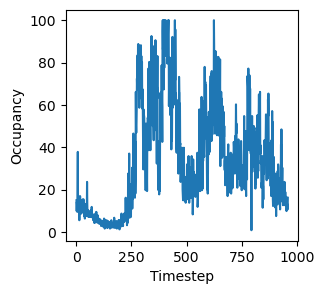

In [5]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [3, 3]

# απεικόνιση χρονοσειράς κατάληψης
plt.plot(occ[1:960]) 
plt.xlabel('Timestep')
plt.ylabel('Occupancy')

Text(0, 0.5, 'Volume')

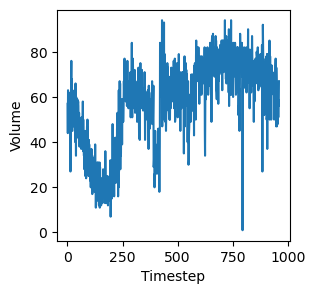

In [6]:
# απεικόνιση χρονοσειρ΄άς φόρτου
plt.plot(vol[1:960])
plt.xlabel('Timestep')
plt.ylabel('Volume')

Το διάγραμμα διασποράς των δύο μεγεθών αντιστοιχεί στο θεμελιώδες διάγραμμα φόρτου-κατάληψης

<AxesSubplot:xlabel='V(t)', ylabel='O(t)'>

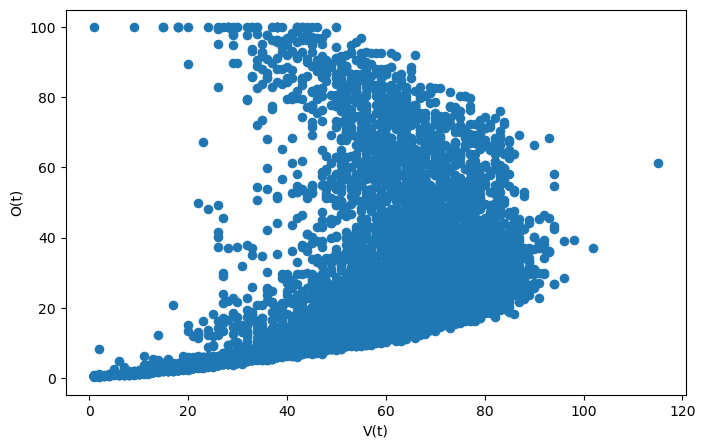

In [7]:
# διάγραμμα διασποράς των δύο μεγεθών (MFD)
plt.rcParams['figure.figsize'] = [8, 5]
df.plot.scatter(x = 'V(t)', y = 'O(t)', s = 35)

## Παράδειγμα 5.1: Αποσύνθεση χρονοσειρών
Μια χρονοσειρά μπορεί να θεωρηθεί ότι αποτελείται από 3 στοιχεία:

**Τάση**: Σταθερά αυξανόμενη ή μειούμενη τιμή στη σειρά.

**Εποχικότητα**: Ο επαναλαμβανόμενος βραχυπρόθεσμος κύκλος στη σειρά.

**Θόρυβος**: Η τυχαία διακύμανση της σειράς.

Υπάρχουν δύο τρόποι συνδυασμού των συνιστωσών, το **προσθετικό** και το **πολλαπλασιαστικό** μοντέλο:

y(t) = Level + Trend + Seasonality + Noise

y(t) = Level * Trend * Seasonality * Noise

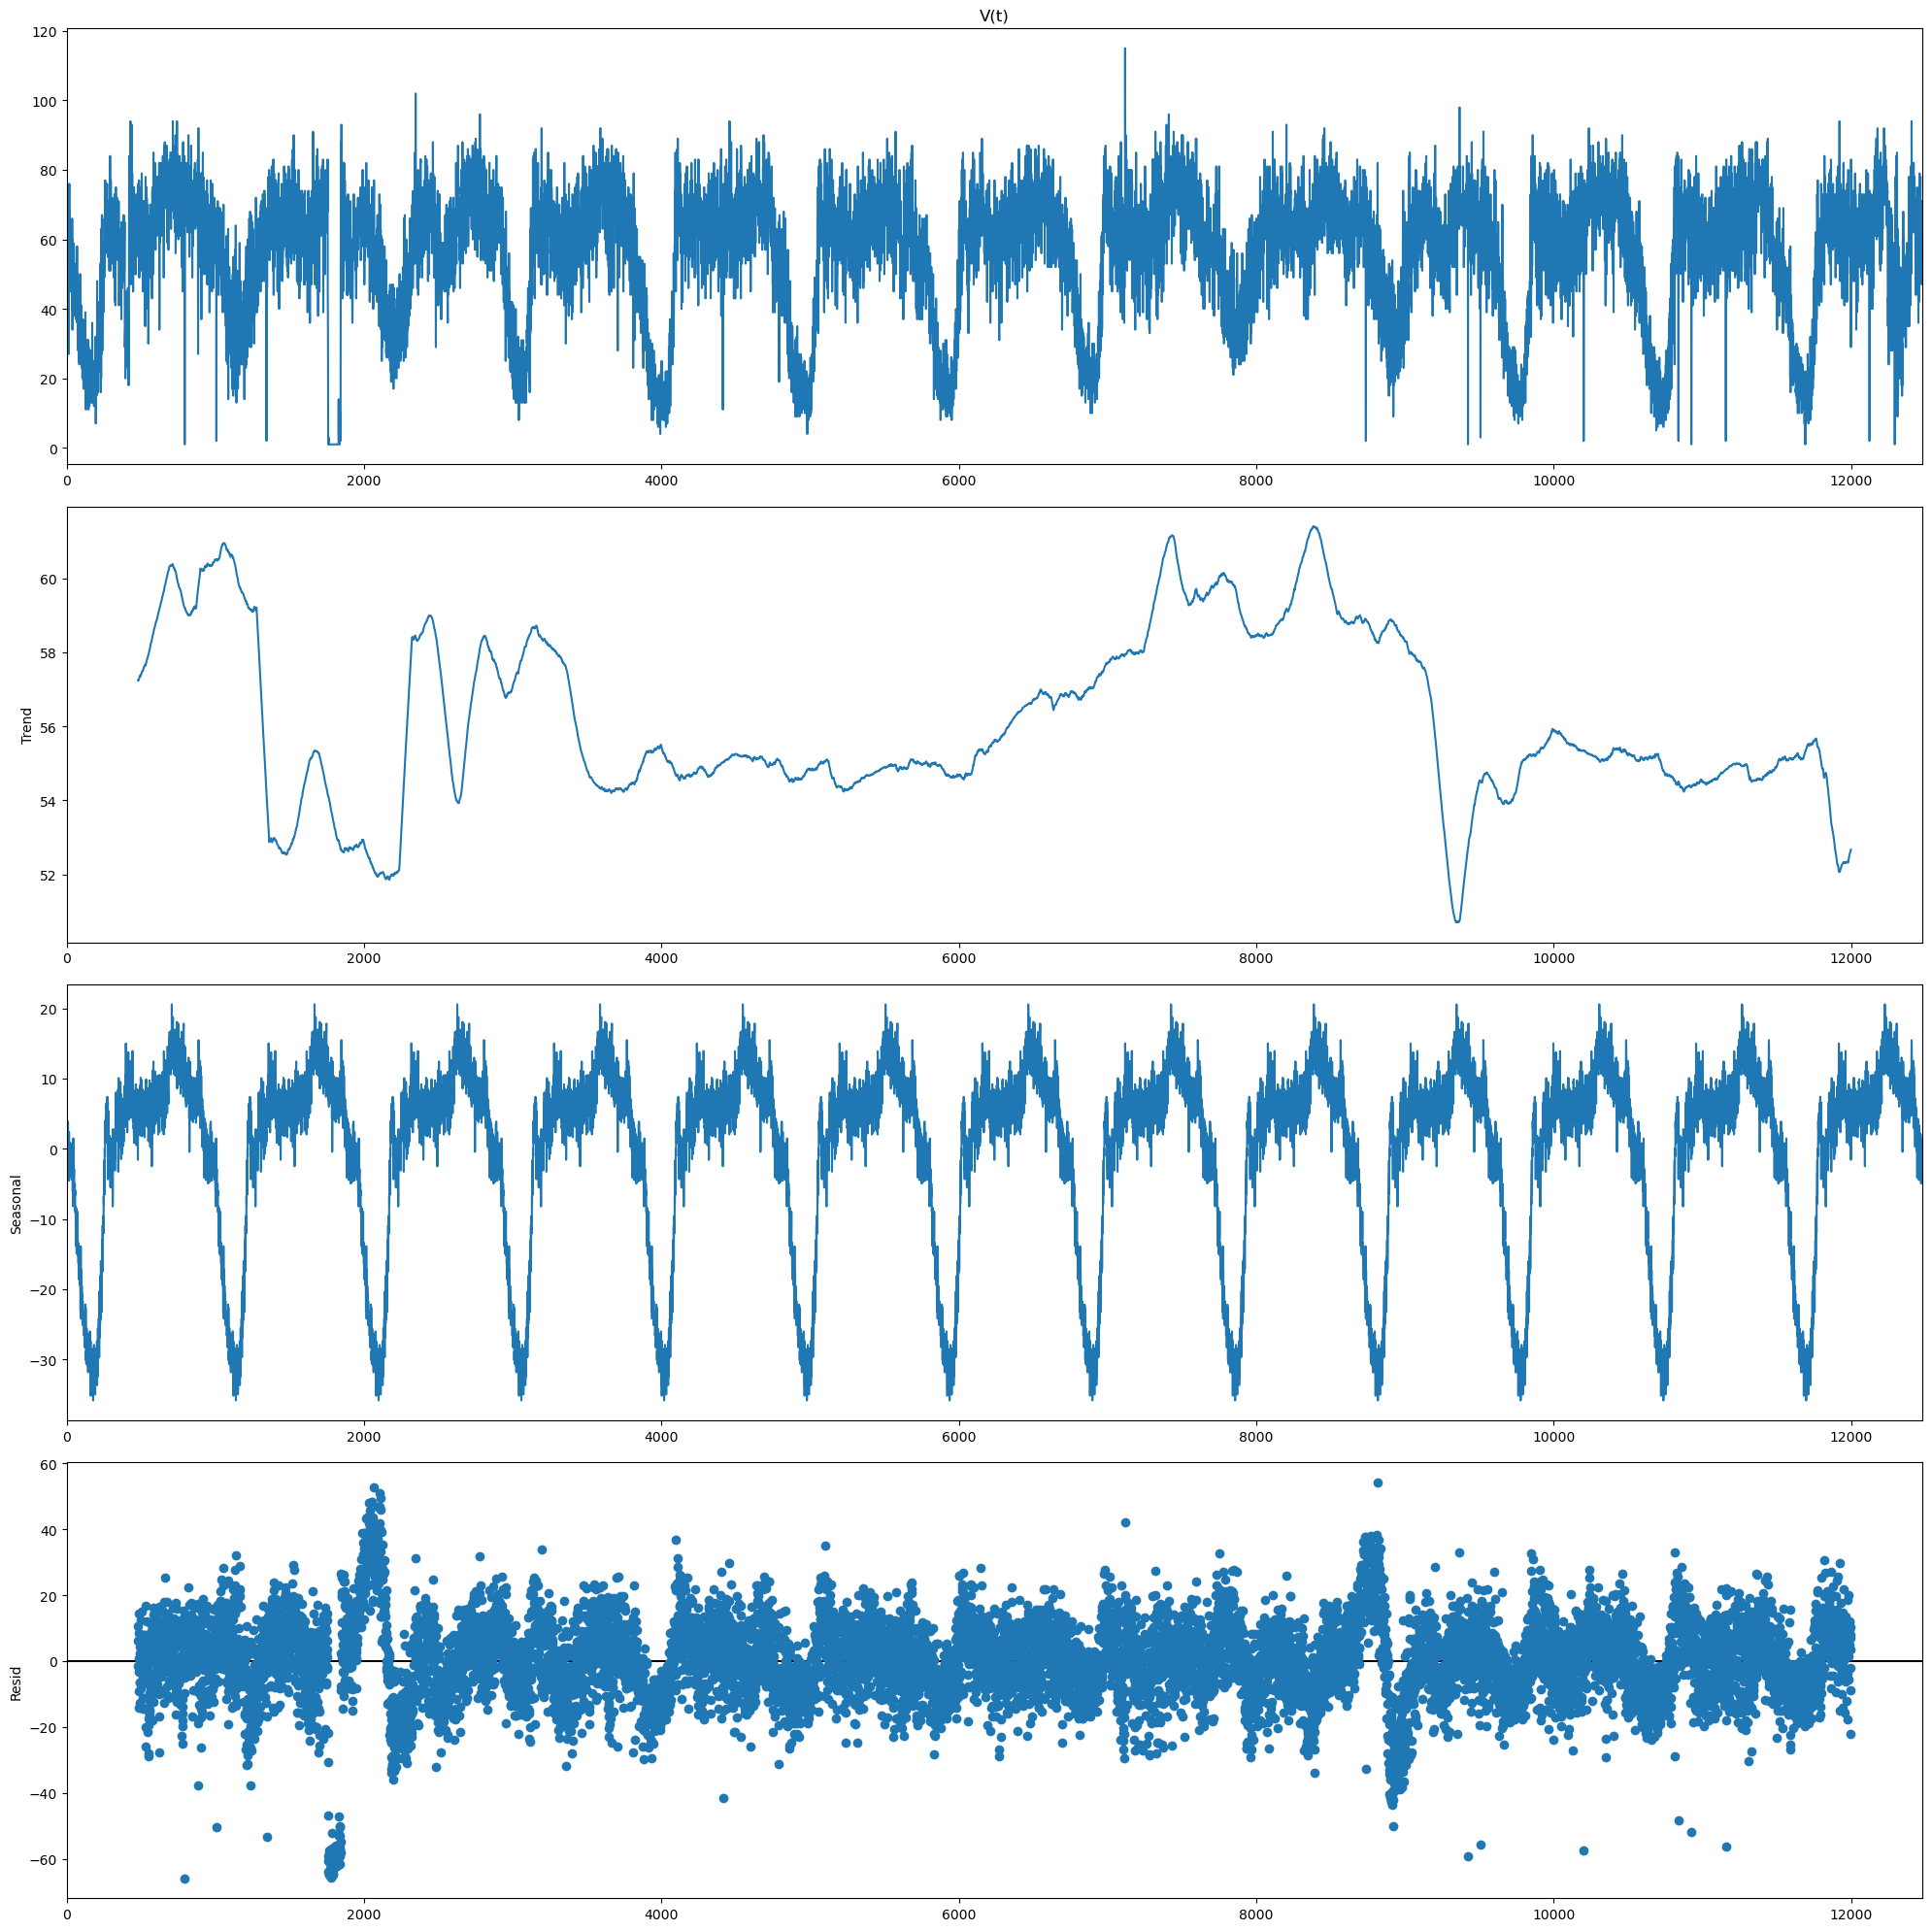

In [8]:
# Υπολογισμός συνιστωσών και παρουσίαση αποτελεσμάτων για τη χρονοσειρά του φόρτου με το προσθετικό μοντέλο
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = [20, 20]

decomposed_ts = seasonal_decompose(vol, model='additive', period=40*24) # period = 40 μετρήσεις ανά ώρα

# εκτύπωση χρονοσειράς και συνιστωσών
decomposed_ts.plot()
plt.show()

In [9]:
# υπολογισμός μέσης τιμής θορύβου
print(decomposed_ts.resid.mean())

0.10339174623842634


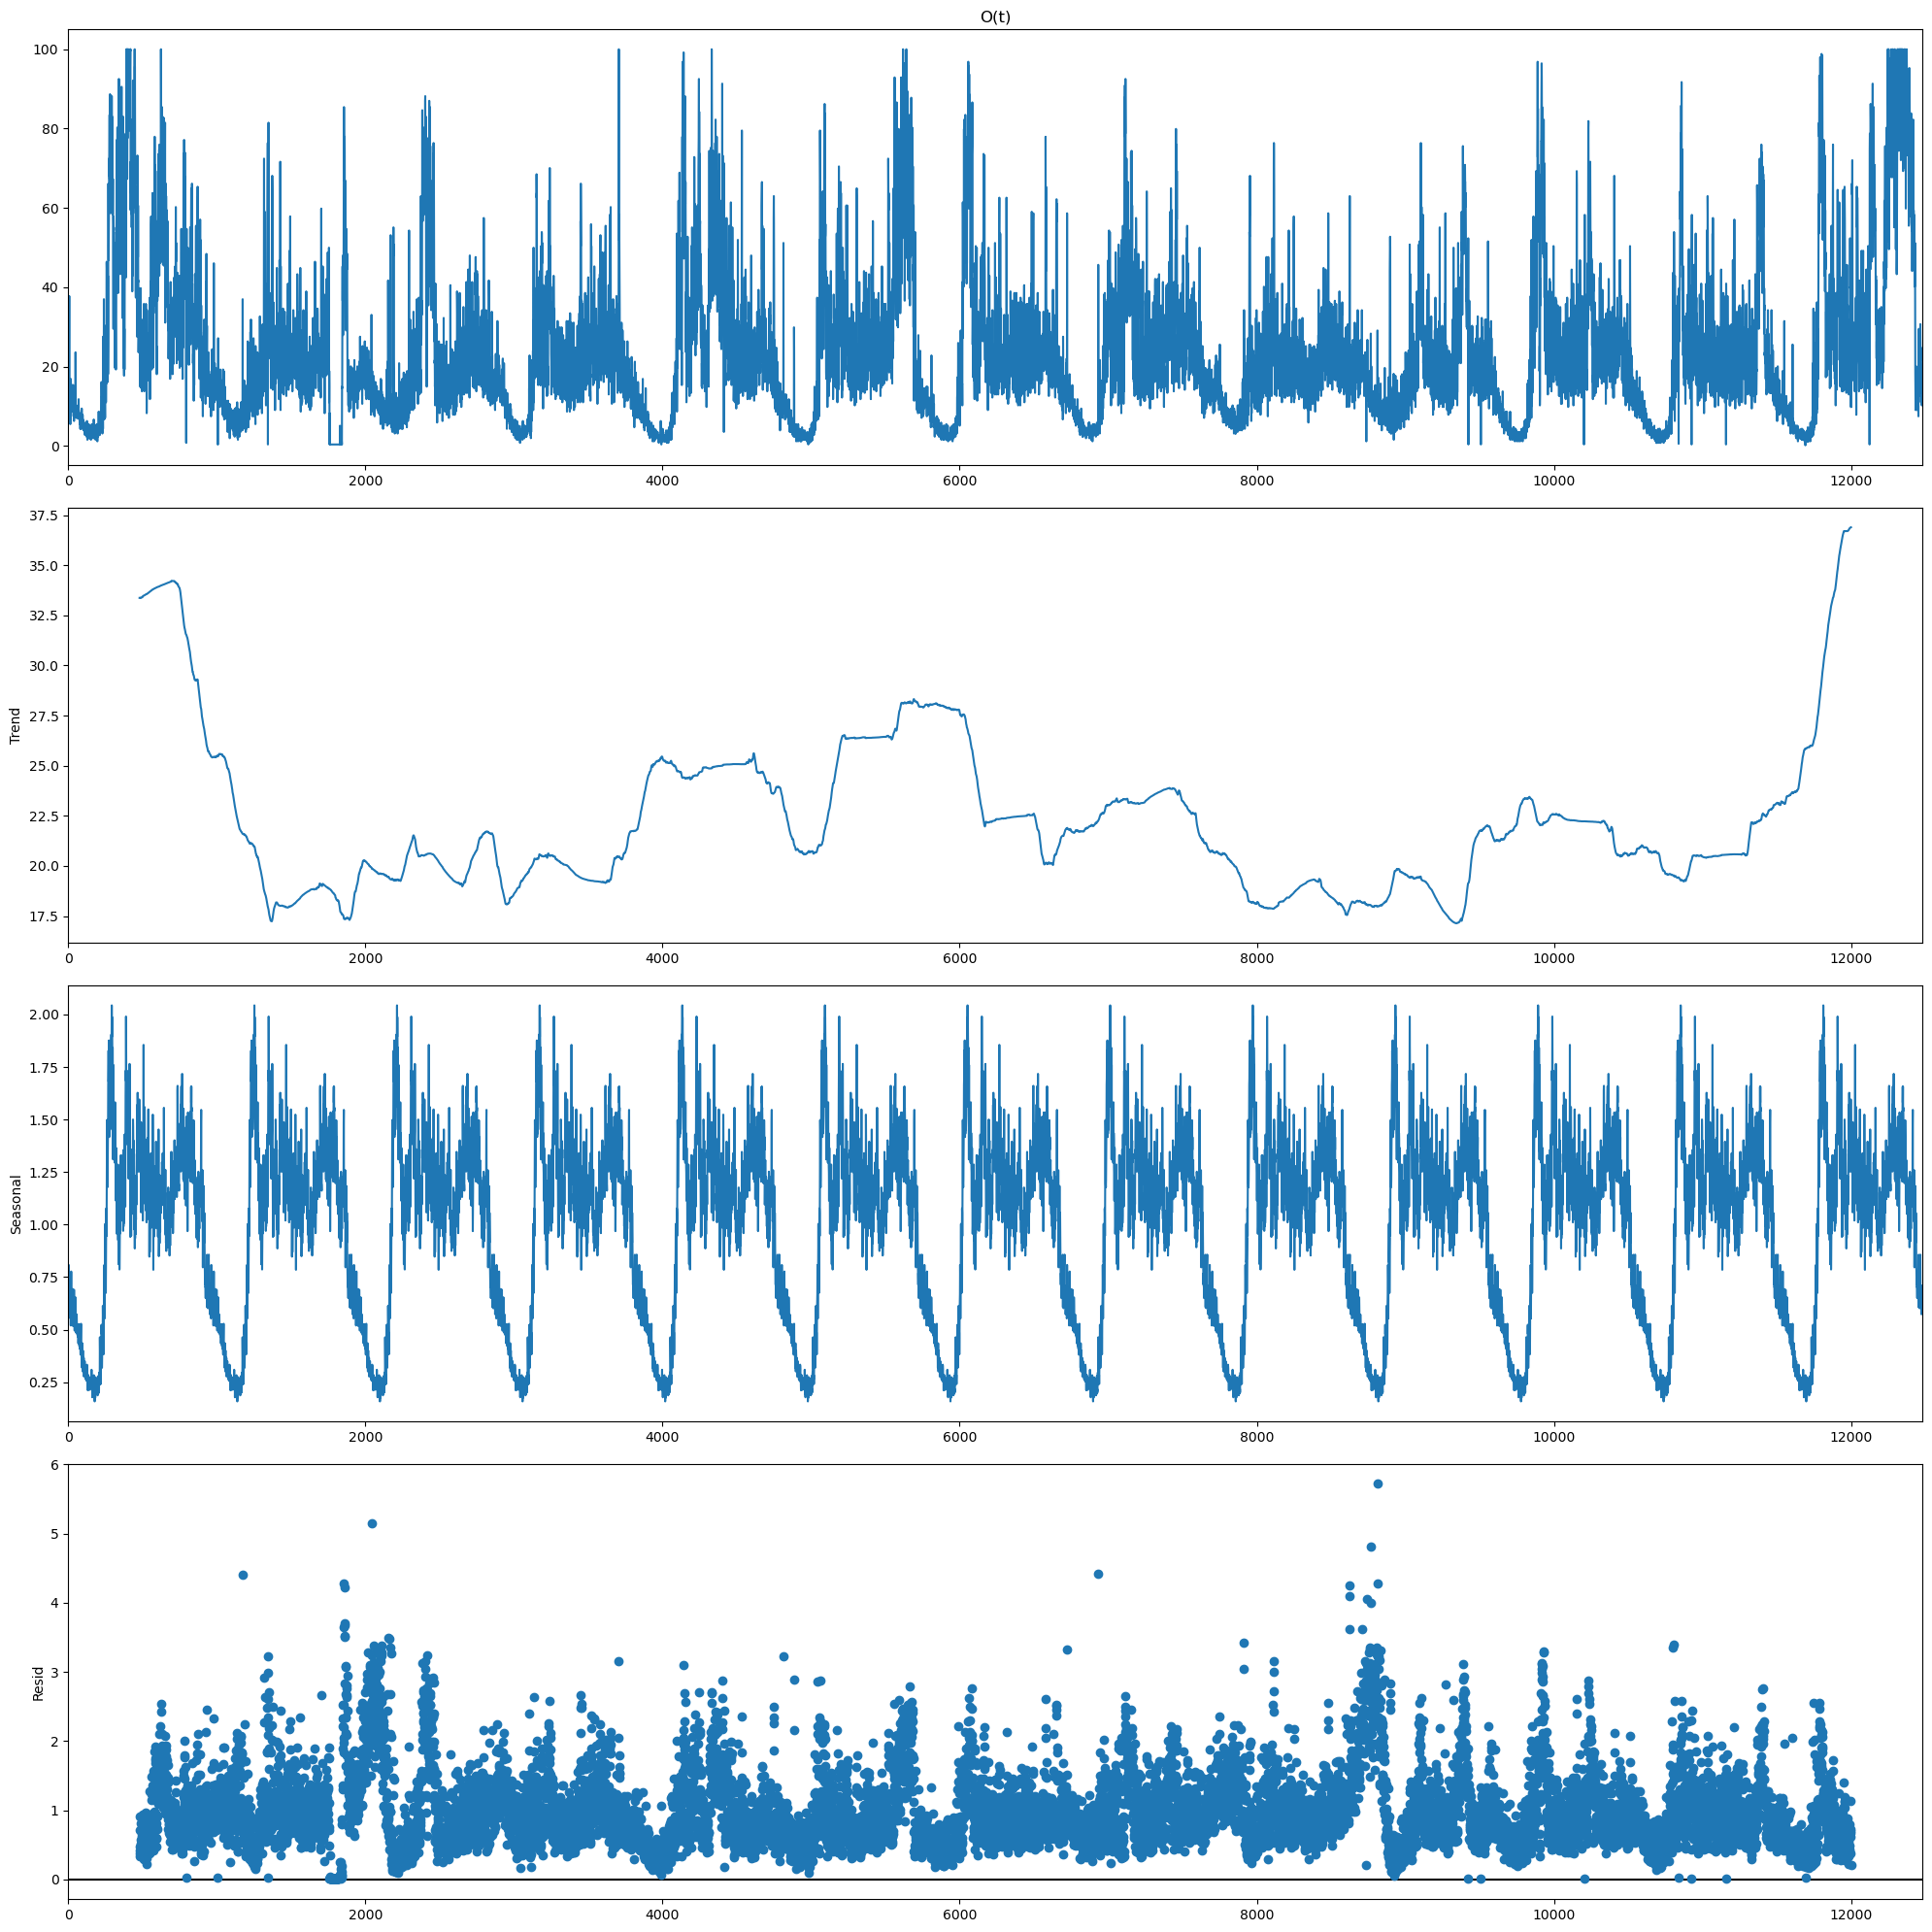

In [10]:
# Υπολογισμός συνιστωσών και παρουσίαση αποτελεσμάτων για τη χρονοσειρά της κατάληψης με το πολλαπλασιαστικό μοντέλο
decomposed_ts = seasonal_decompose(occ, model='multiplicative', period=40*24) # period = 4 μετρήσεις ανά ώρα

# εκτύπωση χρονοσειράς και συνιστωσών
decomposed_ts.plot()
plt.show()

In [11]:
# υπολογισμός μέσης τιμής θορύβου
print(decomposed_ts.resid.mean())

0.9879830124639732


Παρατηρούμε ότι οι χρονοσειρές έχουν ένα πολύ έντονο και σταθερό μοτίβο εποχικότητας, το οποίο συμβάλει ώστε να έχουμε μικρές τιμές θορύβου. Αντίθετα, δεν παρατηρείται ξεκάθαρη και σταθερή τάση, κάτι που οφείλεται στο σχετικά μικρό μήκος της χρονοσειράς.

### Παράδειγμα 5.2: Εξομάλυνση χρονοσειρών

Εφαρμογή μεθόδων κινητού μέσου όρου και εκθετικής εξομάλυνσης.

In [12]:
# υπολογισμός κινητού μέσου όρου χρονοσειράς φόρτου (μήκος παραθύρου υπολογισμού: 3)
vol_smooth = vol.rolling(window=3).mean()
# εκτύπωση τιμών
print (pd.DataFrame({'original_vol':vol, 'smoothed_vol':vol_smooth}))

       original_vol  smoothed_vol
0              54.0           NaN
1              57.0           NaN
2              44.0     51.666667
3              63.0     54.666667
4              48.0     51.666667
...             ...           ...
12475          68.0     66.666667
12476          47.0     59.333333
12477          68.0     61.000000
12478          69.0     61.333333
12479          71.0     69.333333

[12480 rows x 2 columns]


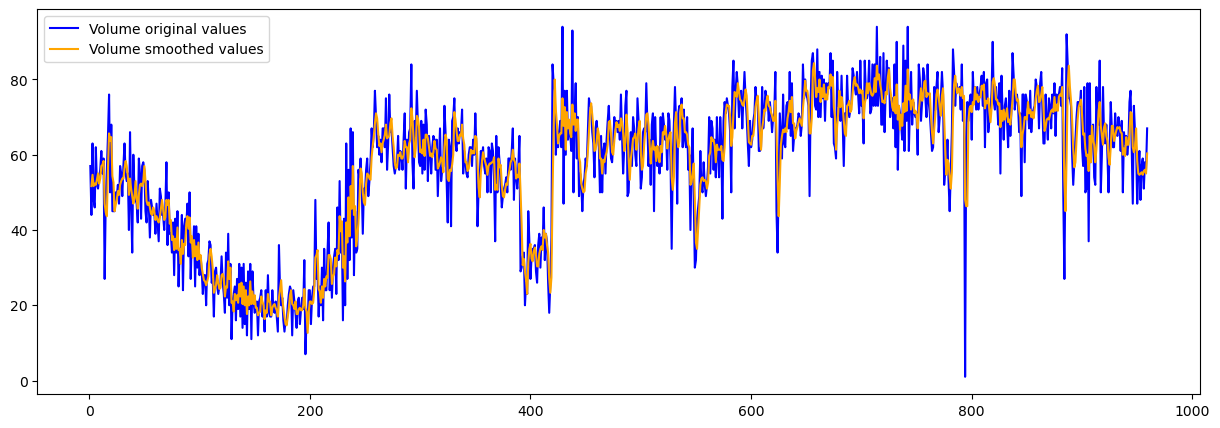

In [35]:
# εκτύπωση των δύο χρονοσειρών
plt.rcParams['figure.figsize'] = [15, 5] #change for better visualization
plt.plot(vol[1:960],color='blue')
plt.plot(vol_smooth[1:960],color='orange')
plt.legend(['Volume original values','Volume smoothed values'])

In [13]:
# εξομάλυνση χρονοσειράς κατάληψης με εκθετική μέθοδο
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

SES = SimpleExpSmoothing(occ[1:960])
# fit model
SES_fit = SES.fit()
# make prediction
occ_smooth = SES_fit.predict(start=0,end=len(occ))
print(pd.DataFrame({'original_occ':occ, 'smoothed_occ':occ_smooth}))

       original_occ  smoothed_occ
0             11.02           NaN
1             14.96     13.604640
2              9.84     14.129019
3             14.17     12.469627
4             11.02     13.127490
...             ...           ...
12477         14.57     13.542292
12478         17.32     13.542292
12479         20.08     13.542292
12480           NaN     13.542292
12481           NaN     13.542292

[12482 rows x 2 columns]


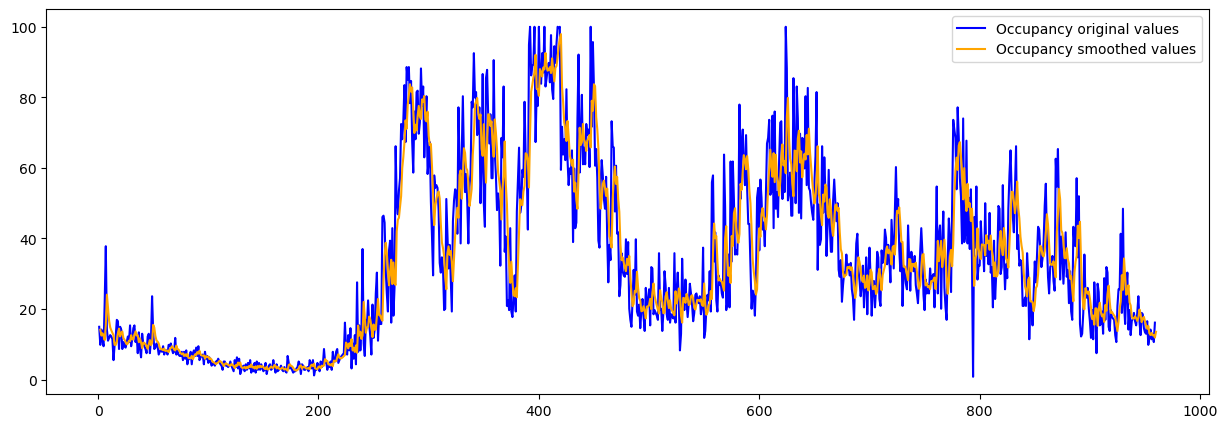

In [37]:
# εκτύπωση των δύο χρονοσειρών
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(occ[1:960],color='blue')
plt.plot(occ_smooth[1:960],color='orange')
plt.legend(['Occupancy original values','Occupancy smoothed values'])

### Παράδειγμα 5.3: Μετασχηματισμός διαφορών
Με την διαφόριση πρώτης τάξης είναι δυνατή η εξάλειψη της γραμμικής τάσης απο μια χρονοσειρά, ενώ με μεγαλύτερης τάξης διαφόριση μπορεί ακόμα να εξαλειφθεί και η εποχικότητα.

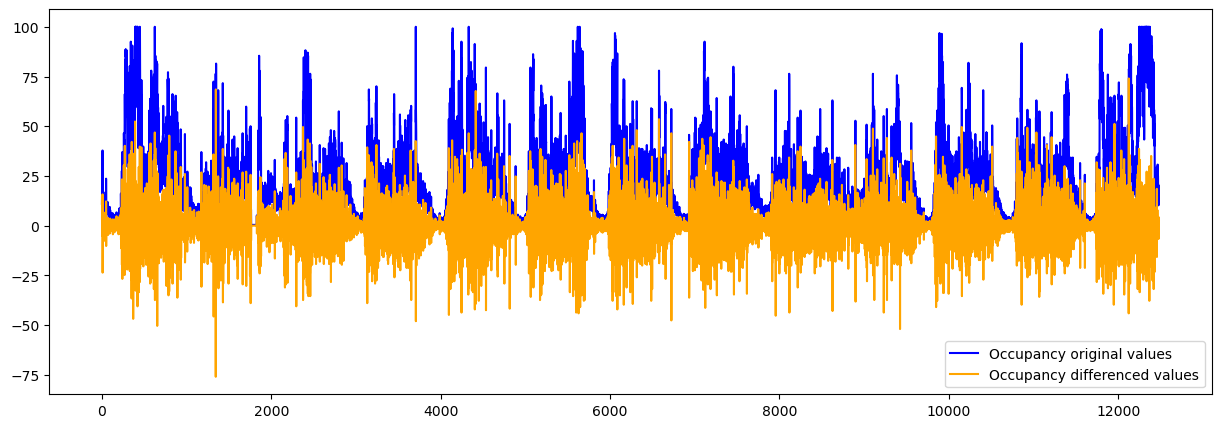

In [14]:
# διαφόριση πρώτης τάξης στη χροροσειρά της κατάληψης και συγκριτική απεικόνιση με την αρχική χρονοσειρά

occ_T = occ.diff(periods=1)

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(occ,color='blue')
plt.plot(occ_T,color='orange')
plt.legend(['Occupancy original values','Occupancy differenced values'])

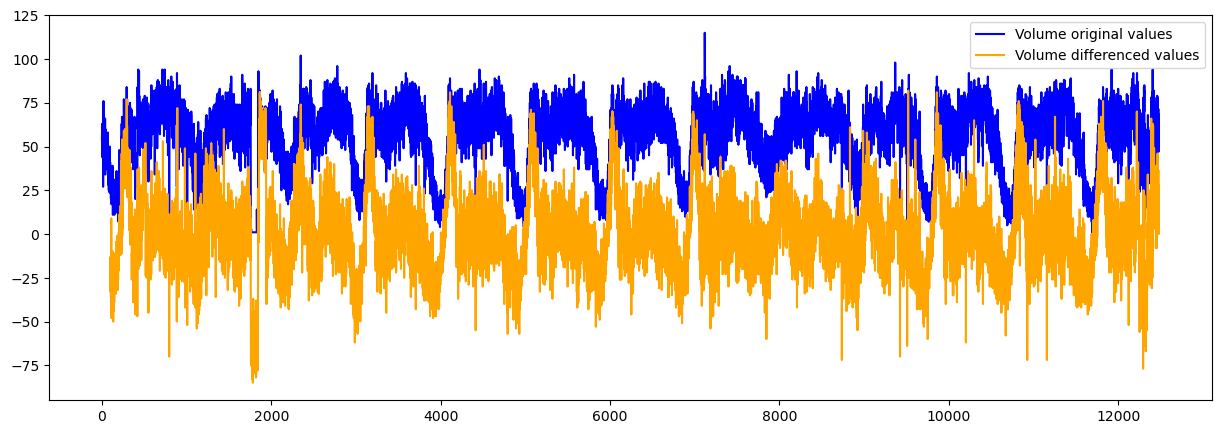

In [15]:
# διαφόριση για την εξάλειψη της εποχικότητας από τη χρονοσειρά της κατάληψης
# η περίοδος είναι 24 ώρες ή 24x4=96 βήματα

vol_1 = vol.diff(periods=96)

plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(vol,color='blue')
plt.plot(vol_1,color='orange')
plt.legend(['Volume original values','Volume differenced values'])

### Παράδειγμα 5.4: Στασιμότητα και Αυτοσυσχέτιση

Οι στατιστικές ιδιότητες μιας χρονοσειράς παραμένουν σταθερές σε όλη τη διάρκεια του χρόνου. Έτσι, είναι ευκολότερο να μοντελοποιήσουμε και να κάνουμε προβλέψεις με βάση μια τέτοια σειρά. Πολλές χρονοσειρές είναι εμφανώς μη στάσιμες (ή διαθέτουν μοναδιαία ρίζα) παρατηρώντας τα γραφήματά τους. Για παράδειγμα, εάν μια χρονοσειρά έχει ισχυρή ανοδική τάση, είναι μη στάσιμη.

In [16]:
# έλεγχος ADF (Augmented Dickey-Fuller) για στασιμότητα
# ελέγχει την ύπαρξη μοναδιαίας ρίζας (μηδενική υπόθεση)
# μια μεγάλη τιμή του p-value δηλώνει ότι δεν μπορεί να απορριφθεί η μηδενική υπόθεση (άρα η χρονοσειρά είναι μη-στάσιμη)
from arch.unitroot import ADF

print('Volume ADF-test results:')
adf = ADF(vol[1:960], trend='n')
print(adf.summary().as_text())

print('\n','\n', 'Occupancy ADF-test results:')
adf = ADF(occ[1:960], trend='n')
print(adf.summary().as_text())

Volume ADF-test results:
   Augmented Dickey-Fuller Results   
Test Statistic                 -0.477
P-value                         0.505
Lags                               11
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

 
 Occupancy ADF-test results:
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.521
P-value                         0.120
Lags                                7
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [17]:
# έλεγχος KPSS για στασιμότητα
# Η κύρια διαφορά από τον έλεγχο ADF είναι ότι μια χρονοσειρά με ντετερμινιστική τάση δεν θα θεωρηθεί μη στάσιμη.
# προσοχή! εδώ η μηδενική υπόθεση είναι ΄ότι η χρονοσειρά είναι στάσιμη
from arch.unitroot import KPSS

print('Volume KPSS-test results:')
kpss = KPSS(vol[1:960], trend='ct')
print(kpss.summary().as_text())

print('\n','\n', 'Occupancy KPSS-test results:')
kpss = KPSS(occ[1:960], trend='ct')
print(kpss.summary().as_text())

# Phillips-Perron test

from arch.unitroot import PhillipsPerron

print('Volume PP-test results:')
pp = PhillipsPerron(vol[1:960])
print(pp.summary().as_text())

print('\n','\n', 'Occupancy PP-test results:')
pp = PhillipsPerron(occ[1:960])
print(pp.summary().as_text())

Volume KPSS-test results:
    KPSS Stationarity Test Results   
Test Statistic                  0.291
P-value                         0.002
Lags                               18
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

 
 Occupancy KPSS-test results:
    KPSS Stationarity Test Results   
Test Statistic                  0.610
P-value                         0.000
Lags                               18
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
Volume PP-test results:
     Phillips-Perron Test (Z-tau)    
Test Statistic                -14.934
P-value                         0.000
Lags                       

In [18]:
# ωριaία δεδομένα
# έλεγχος KPSS για στασιμότητα
# Η κύρια διαφορά από τον έλεγχο ADF είναι ότι μια χρονοσειρά με ντετερμινιστική τάση δεν θα θεωρηθεί μη στάσιμη.
# προσοχή! εδώ η μηδενική υπόθεση είναι ΄ότι η χρονοσειρά είναι στάσιμη
from arch.unitroot import KPSS

print('Volume KPSS-test results:')
kpss = KPSS(volh[1:24], trend='ct')
print(kpss.summary().as_text())

print('\n','\n', 'Occupancy KPSS-test results:')
kpss = KPSS(occh[1:24], trend='ct')
print(kpss.summary().as_text())

# Phillips-Perron test

from arch.unitroot import PhillipsPerron

print('Volume PP-test results:')
pp = PhillipsPerron(volh[1:24])
print(pp.summary().as_text())

print('\n','\n', 'Occupancy PP-test results:')
pp = PhillipsPerron(occh[1:24])
print(pp.summary().as_text())

Volume KPSS-test results:
    KPSS Stationarity Test Results   
Test Statistic                  0.121
P-value                         0.097
Lags                                2
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

 
 Occupancy KPSS-test results:
    KPSS Stationarity Test Results   
Test Statistic                  0.152
P-value                         0.045
Lags                                2
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
Volume PP-test results:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.098
P-value                         0.716
Lags                       

Η ACF (Autocorrelation function) είναι η συσχέτιση της χρονοσειράς με τις υστερήσεις της. Μετρά τη γραμμική σχέση μεταξύ των καθυστερημένων τιμών της χρονοσειράς.

First plot is for Volume, second for Occupancy


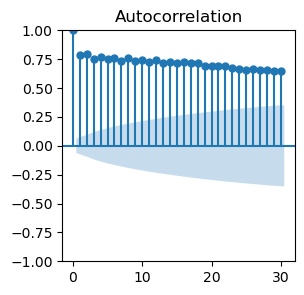

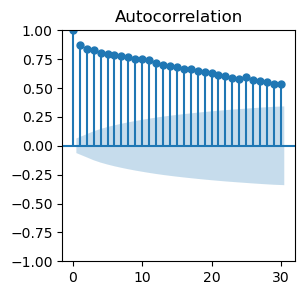

In [19]:
# εκτύπωση ACF
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams['figure.figsize'] = [3, 3]
acf1 = plot_acf(vol[1:960])
acf2 = plot_acf(occ[1:960])
print('First plot is for Volume, second for Occupancy')


Η ACF είναι εύκολο να μετρηθεί. Αλλά στην πραγματικότητα, οι σχέσεις μεταξύ των υστερήσεων είναι πιο περίπλοκες. Για παράδειγμα, μπορούμε να υποθέσουμε ότι οι y(t) και y(t-1) συσχετίζονται και οι y(t-1) και y(t-2) επίσης συσχετίζονται. Λόγω των συσχετίσεών τους με την y(t-1), οι y(t) και y(t-2) πρέπει επίσης να συσχετίζονται. Πώς μπορούμε να μετρήσουμε αν υπάρχει νέα πληροφορία στο y(t-2) για την πρόβλεψη του y(t), εκτός από τις σχέσεις τους με το y(t-1);

Γι' αυτό χρειαζόμαστε έναν άλλο ορισμό που ονομάζεται μερική αυτοσυσχέτιση. Η PACF (συνάρτηση μερικής αυτοσυσχέτισης) δείχνει τη μερική συσχέτιση της χρονοσειράς με τις υστερήσεις της, μετά την αφαίρεση των επιδράσεων των υστερήσεων χαμηλότερης τάξης μεταξύ τους.

First plot is for Volume, second for Occupancy


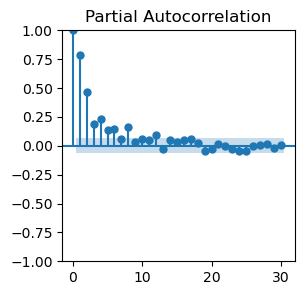

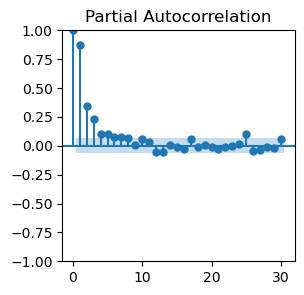

In [20]:
# εκτύπωση pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf1 = plot_pacf(vol[1:960])
pacf2 = plot_pacf(occ[1:960])
print('First plot is for Volume, second for Occupancy')

Οι υψηλές θετικές τιμές ACF, με αργή απομείωση και πολύ λίγες (1 ή 2) αιχμές στο διάγραμμα PACF είναι και τα δύο σημάδια μιας χρονοσειράς με τάση και μη στάσιμης.



PREPEI NA VALOYME TO test gia fractional integration....

As a further step in this investigation, the GPH approach was used to estimate the fractional integration parameter for each of these variables (Geweke and Porter-Hudak, 1983). The results show the fractional integration parameter for occupancy and volume to be 0.35 and 0.20 respectively which is a clear indication of long memory (see Karlaftis and Vlahogianni, 2009, for a more in-depth discussion of the implications of fractional integration in practice). The fractional integration parameter for the travel card sales is 0.73, indicating that stationarity cannot be verified, further complicating the largely inconclusive findings from the Dickey-Fuller tests.  





First plot is for Volume, second for Occupancy


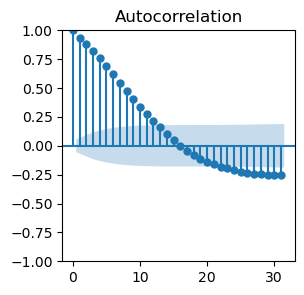

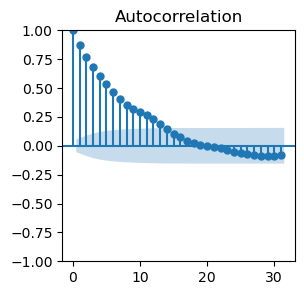

In [21]:
# εκτύπωση ACF για 15 min
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams['figure.figsize'] = [3, 3]
acf11 = plot_acf(vol10)
acf22 = plot_acf(occ10)
print('First plot is for Volume, second for Occupancy')


First plot is for Volume, second for Occupancy


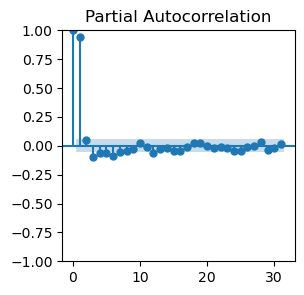

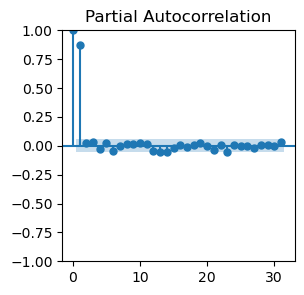

In [23]:
# εκτύπωση pacf για 15 min
from statsmodels.graphics.tsaplots import plot_pacf
pacf1 = plot_pacf(vol10)
pacf2 = plot_pacf(occ10)
print('First plot is for Volume, second for Occupancy')

First plot is for Volume, second for Occupancy


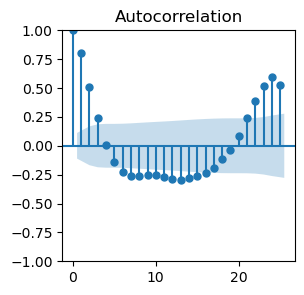

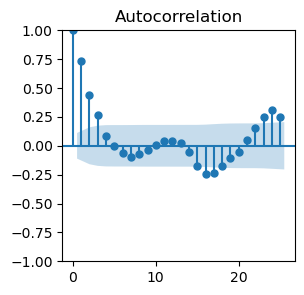

In [24]:

# εκτύπωση ACF για 1 h
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams['figure.figsize'] = [3, 3]
acf11 = plot_acf(volh[1:960])
acf22 = plot_acf(occh[1:960])
print('First plot is for Volume, second for Occupancy')

First plot is for Volume, second for Occupancy


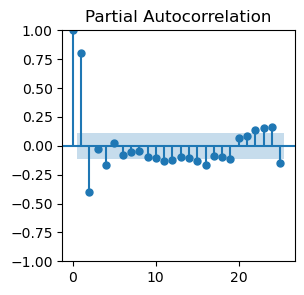

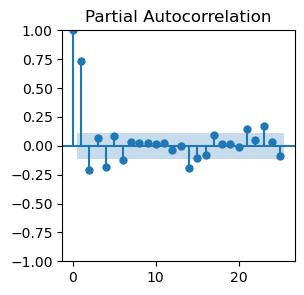

In [25]:
# εκτύπωση pacf για 1 h
from statsmodels.graphics.tsaplots import plot_pacf
pacf1 = plot_pacf(volh)
pacf2 = plot_pacf(occh)
print('First plot is for Volume, second for Occupancy')

## Παράδειγμα 5.5: ARIMA

Τα ARIMA είναι μια κατηγορία στατιστικών μοντέλων για την πρόβλεψη και ανάλυσης χρονοσειρών και σημαίνει Auto-Regressive Integrated Moving Average. Αποτελείται από τρία στοιχεία:

AR (Auto-Regressive): η χρονοσειρά παλινδρομεί γραμμικά στις παρελθοντικές τιμές της.

I (Integrated): εάν δεν είναι στάσιμη, η χρονοσειρά μπορεί να διαφοριστεί για να γίνει στάσιμη, δηλαδή να υπολογιστούν οι διαφορές μεταξύ διαδοχικών παρατηρήσεων.

MA (Moving Average): η χρονοσειρά "παλινδρομεί" επί των παρελθόντων σφαλμάτων πρόβλεψης

Αντίστοιχα λοιπόν με τις τρεις συνιστώσες του ARIMA που αναφέρθηκαν παραπάνω, υπάρχουν τρεις παράμετροι p, d και q. Παίρνουν μη αρνητικές ακέραιες τιμές, υποδεικνύοντας ποιο συγκεκριμένο μοντέλο ARIMA χρησιμοποιείται.

p: ο αριθμός των παρελθοντικών τιμών που περιλαμβάνονται στο μοντέλο AR.

d: η τάξη διαφόρισης της χρονοσειράς.

q: ο αριθμός των παρελθοντικών σφαλμάτων πρόβλεψης που περιλαμβάνονται στο μοντέλο ΜΑ ή το μέγεθος του παραθύρου του κινητού μέσου όρου.

Το μοντέλο αναπαρίσταται ως ARIMA(p, d, q).

In [26]:
# ανάπτυξη ενός μοντέλου ARIMA και πραγματοποίηση πρόβλεψης
from statsmodels.tsa.arima.model import ARIMA
# χρήση 100 τελευταίων παρατηρήσεων για αξιολόγηση του μοντέλου και των υπόλοιπων για εκπαίδευση
train = df2.iloc[:-100,:]
test = df2.iloc[-100:,:]
train



,vol40,occ40
0,2176.0,12.484
1,1871.0,9.161
2,1321.0,5.628
3,914.0,3.639
4,812.0,3.351
...,...,...
207,2622.0,18.505
208,2295.0,14.636
209,2542.0,15.529
210,2810.0,20.964


In [27]:
# auto_arima is a package for automatically detecting best ARIMA model
#!pip install pmdarima #you may have to install pmdarima
import pmdarima as pm

########## Volume ##########
best_arima = pm.auto_arima(train['vol40'],max_p=4, max_d=1, max_q=4,trace=True, information_criterion='bic') # stepwise search https://doi.org/10.18637/jss.v027.i03 
# print best model
best_arima 


best_arima.summary()

ModuleNotFoundError: No module named 'pmdarima'

In [28]:
########## Occupancy ##########
best_arima = pm.auto_arima(train['occ40'],max_p=4, max_d=1, max_q=4,trace=True, information_criterion='bic') # stepwise search https://doi.org/10.18637/jss.v027.i03 
# print best model
best_arima 


best_arima.summary()

NameError: name 'pm' is not defined

### Καθορισμός των παραμέτρων

Για μια στάσιμη χρονοσειρά, d=0. Για μη-στάσιμες χρονοσειρές, η τιμή του d πρέπει να είναι τουλάχιστον 1. Αν το μοτίβο της μη στασιμότητας είναι ισχυρότερο, το d μπορεί να πάρει τιμή 2,3, ...

"Κανόνας του αντίχειρα" για τα p και q:

- Το διάγραμμα PACF έχει μια σημαντική αιχμή στην υστέρηση p, αλλά όχι πέραν αυτής - το διάγραμμα ACF φθίνει πιο σταδιακά.

- Το διάγραμμα ACF έχει σημαντική αιχμή στην υστέρηση q, αλλά όχι πέραν αυτής - το διάγραμμα PACF φθίνει πιο σταδιακά.


In [29]:
# ανάπτυξη ενός μοντέλου ARIMA και πραγματοποίηση πρόβλεψης
from statsmodels.tsa.arima.model import ARIMA
# χρήση 100 τελευταίων παρατηρήσεων για αξιολόγηση του μοντέλου και των υπόλοιπων για εκπαίδευση
train = df2.iloc[:-100,:]
test = df2.iloc[-100:,:]
train
########## VOLUME ##########
d=0
p=2
q=0

# εκπαίδευση μοντέλου και πρόβλεψη με τη μέθοδο walk forward (χρήση πρόβλεψης προηγούμενου βήματος στην πρόβλεψη του επόμενου)
history = list(train['vol40'])
test1 = list(test['vol40'])
predictions1 = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output
    predictions1.append(yhat)
    obs = test1[t]
    history.append(obs)



In [56]:
# εκτίμηση σφαλμάτων
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print("Volume RMSE:", mean_squared_error(test['vol40'].values, predictions1, squared=False))
print("Volume MAE:", mean_absolute_error(test['vol40'].values, predictions1))
print("Volume MAPE:", mean_absolute_percentage_error(test['vol40'].values, predictions1))

Volume RMSE: 313.7632350368778
Volume MAE: 241.9224404044532
Volume MAPE: 0.14872647914582587


In [57]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  311
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -2267.304
Date:                Fri, 02 Jun 2023   AIC                           4542.609
Time:                        11:42:49   BIC                           4557.568
Sample:                             0   HQIC                          4548.588
                                - 311                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2295.2894    103.553     22.165      0.000    2092.328    2498.250
ar.L1          1.1297      0.039     28.788      0.000       1.053       1.207
ar.L2         -0.4046      0.031    -12.902      0.000      -0.466      -0.343
sigma2      1.258e+05   6184.308     20.340      0.000    1.14e+05    1.38e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              1091.07
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

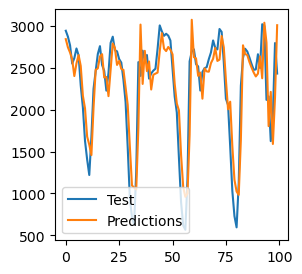

In [58]:
# εκτύπωση πραγματικής χρονοσειράς και πρόβλεψης
plt.rcParams['figure.figsize'] = [3, 3]
plt.plot(test['vol40'].values, label='Test')
plt.plot(predictions1, label='Predictions')
plt.legend()

C:\Users\Windows\AppData\Local\Temp\ipykernel_3944\2964807251.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1, p2], [p1, p2], 'b-', c='red')


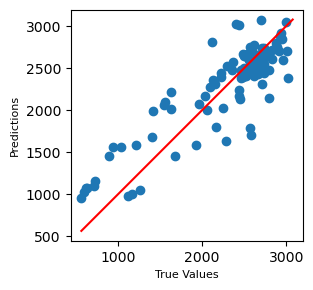

In [60]:
# διάγραμμα διασποράς πραγματικών τιμών-προβλέψεων

# y=x line
p1 = max(max(predictions1), max(test['vol40']))
p2 = min(min(predictions1), min(test['vol40']))
plt.rcParams['figure.figsize'] = [3, 3]
plt.plot([p1, p2], [p1, p2], 'b-', c='red')

plt.scatter(test['vol40'], predictions1)
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

In [61]:
########## OCCUPANCY ##########
d=0
p=2
q=0

# εκπαίδευση μοντέλου και πρόβλεψη
history = list(train['occ40'])
test1 = list(test['occ40'])
predictions2 = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(p,d,q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output
    predictions2.append(yhat)
    obs = test1[t]
    history.append(obs)

# εκτίμηση σφαλμάτων
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
print("RMSE:", mean_squared_error(test['occ40'].values, predictions2, squared=False))
print("MAE:", mean_absolute_error(test['occ40'].values, predictions2))
print("MAPE:", mean_absolute_percentage_error(test['occ40'].values, predictions2))

RMSE: 11.693467963075417
MAE: 7.789866830116729
MAPE: 0.49013211352471664


In [62]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  311
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -1168.533
Date:                Fri, 02 Jun 2023   AIC                           2345.067
Time:                        11:43:44   BIC                           2360.026
Sample:                             0   HQIC                          2351.046
                                - 311                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5528      2.616      9.003      0.000      18.425      28.680
ar.L1          0.8752      0.044     19.724      0.000       0.788       0.962
ar.L2         -0.1908      0.040     -4.719      0.000      -0.270      -0.112
sigma2       107.1318      6.518     16.436      0.000      94.356     119.907
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):               217.37
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                             1.14
Prob(H) (two-sided):                  0.23   Kurtosis:                         6.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

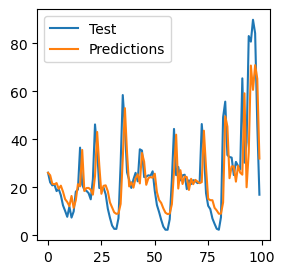

In [63]:
# plot actual vs predicted values
plt.rcParams['figure.figsize'] = [3, 3]
plt.plot(test['occ40'].values, label='Test')
plt.plot(predictions2, label='Predictions')
plt.legend()

C:\Users\Windows\AppData\Local\Temp\ipykernel_3944\52878883.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1, p2], [p1, p2], 'b-', c='red')


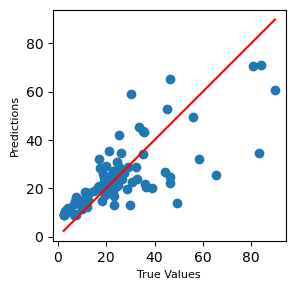

In [64]:
# print true vs predicted scatter plot

# y=x line
p1 = max(max(predictions2), max(test['occ40']))
p2 = min(min(predictions2), min(test['occ40']))
plt.rcParams['figure.figsize'] = [3, 3]
plt.plot([p1, p2], [p1, p2], 'b-', c='red')

plt.scatter(test['occ40'], predictions2)
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

### Παράδειγμα 5.6: Εκπαίδευση και σύγκριση με μοντέλα Βαθιάς Μηχανικής Μάθησης

In [150]:
# προετοιμασία δεδομένων

import numpy as np

w = 3 # μέγεθος κυλιόμενου παραθύρου (look-back steps) 
y = df2.iloc[w:].values

lx = []
for i in range(len(df2)-w):
    xi = df2.iloc[i:i+w] 
    lx.append(xi)

x = np.asarray(lx) # μετατροπή σε np array

In [151]:
# φόρτωση πακέτων
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping


# χρήση του 20% των δεδομένων για αξιολόγηση (test set)
x_train = x[:int(0.8*len(df2))]
x_test = x[int(0.8*len(df2)):]
y_train = y[:int(0.8*len(df2))]
y_test = y[int(0.8*len(df2)):]

### Απλό Νευρωνικό Δίκτυο(Multi-layer perceptron -  MLP)

In [152]:
################ OCCUPANCY ###################
# δομή μοντέλου
mlp_occ = Sequential()
#mlp_occ.add(Dense(32, activation='relu')) 
#mlp_occ.add(Dense(32, activation='relu')) 
mlp_occ.add(Dense(16, activation='relu')) 
mlp_occ.add(Dense(1, activation='relu')) 
# εκπαίδευση μοντέλου
early_stop2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=10)
mlp_occ.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
mlp_occ.fit(x_train[:,:,1], y_train[:,1],epochs=80,batch_size=16,validation_split=0.2) # 20% of the train set is used for cross validation

Epoch 1/80
13/13 [==============================] - 0s 8ms/step - loss: 688.2464 - mean_absolute_error: 21.9060 - val_loss: 403.8812 - val_mean_absolute_error: 17.2756
Epoch 2/80
13/13 [==============================] - 0s 1ms/step - loss: 512.6966 - mean_absolute_error: 18.2952 - val_loss: 289.1761 - val_mean_absolute_error: 13.7630
Epoch 3/80
13/13 [==============================] - 0s 2ms/step - loss: 363.1181 - mean_absolute_error: 14.4211 - val_loss: 205.3330 - val_mean_absolute_error: 10.4915
Epoch 4/80
13/13 [==============================] - 0s 3ms/step - loss: 264.3081 - mean_absolute_error: 11.7336 - val_loss: 155.8619 - val_mean_absolute_error: 8.3088
Epoch 5/80
13/13 [==============================] - 0s 2ms/step - loss: 212.2691 - mean_absolute_error: 10.1835 - val_loss: 129.5126 - val_mean_absolute_error: 7.1832
Epoch 6/80
13/13 [==============================] - 0s 1ms/step - loss: 182.3071 - mean_absolute_error: 9.3675 - val_loss: 118.3058 - val_mean_absolute_error: 6.7

In [153]:
# πρόβλεψη και αξιολόγηση
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
pred_mlp = mlp_occ.predict(x_test[:,:,1])

print("Occupancy RMSE:", mean_squared_error(y_test[:,1], pred_mlp, squared=False))
print("Occupancy MAE:", mean_absolute_error(y_test[:,1], pred_mlp))
print("Occupancy MAPE:", mean_absolute_percentage_error(y_test[:,1], pred_mlp))

2/2 [==============================] - 0s 2ms/step
Occupancy RMSE: 13.577591662953836
Occupancy MAE: 8.538608624680839
Occupancy MAPE: 0.36388776214387925


Occupancy


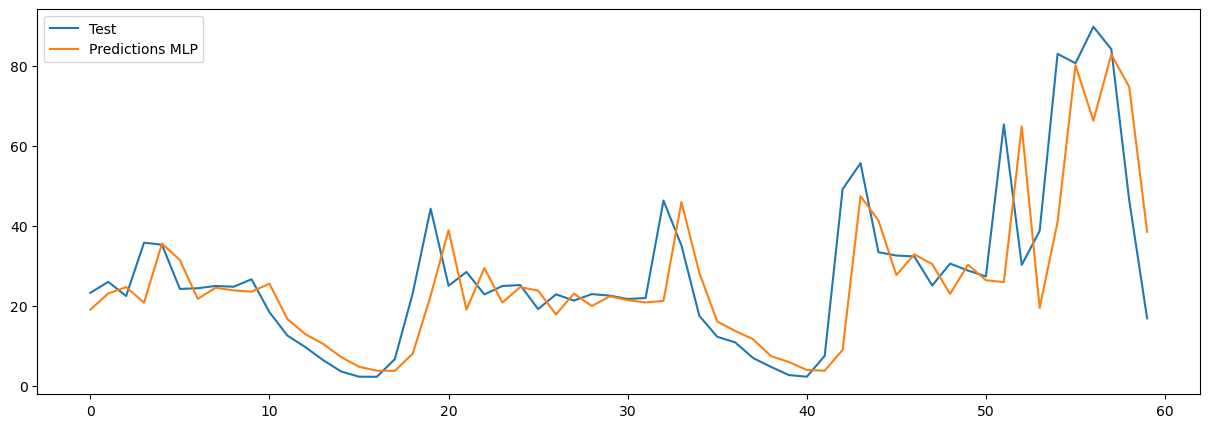

In [154]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(y_test[:,1], label='Test')
plt.plot(pred_mlp, label='Predictions MLP')
plt.legend()
print('Occupancy')

In [155]:
################ VOLUME ###################
# δομή μοντέλου
mlp_vol = Sequential()
#mlp_vol.add(Dense(64, activation='relu')) 
#mlp_vol.add(Dense(32, activation='relu')) 
mlp_vol.add(Dense(16, activation='relu')) 
mlp_vol.add(Dense(1, activation='relu')) 
# εκπαίδευση μοντέλου
early_stop2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=10)
mlp_vol.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
mlp_vol.fit(x_train[:,:,0], y_train[:,0],epochs=200,batch_size=16,validation_split=0.2)

Epoch 1/200
13/13 [==============================] - 0s 8ms/step - loss: 495865.1250 - mean_absolute_error: 507.9619 - val_loss: 337089.0000 - val_mean_absolute_error: 425.8254
Epoch 2/200
13/13 [==============================] - 0s 2ms/step - loss: 455180.0312 - mean_absolute_error: 488.4238 - val_loss: 309461.9062 - val_mean_absolute_error: 408.5702
Epoch 3/200
13/13 [==============================] - 0s 1ms/step - loss: 421790.6250 - mean_absolute_error: 468.6185 - val_loss: 287204.0938 - val_mean_absolute_error: 393.3802
Epoch 4/200
13/13 [==============================] - 0s 1ms/step - loss: 395214.5938 - mean_absolute_error: 453.0642 - val_loss: 268486.9062 - val_mean_absolute_error: 382.5326
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 371571.7812 - mean_absolute_error: 442.5825 - val_loss: 251895.5156 - val_mean_absolute_error: 372.8170
Epoch 6/200
13/13 [==============================] - 0s 2ms/step - loss: 348734.9062 - mean_absolute_error: 426.485

13/13 [==============================] - 0s 2ms/step - loss: 146790.8281 - mean_absolute_error: 250.1712 - val_loss: 81016.2969 - val_mean_absolute_error: 202.3920
Epoch 94/200
13/13 [==============================] - 0s 1ms/step - loss: 146067.3438 - mean_absolute_error: 249.9463 - val_loss: 80822.5781 - val_mean_absolute_error: 200.9338
Epoch 95/200
13/13 [==============================] - 0s 2ms/step - loss: 145718.1094 - mean_absolute_error: 248.9497 - val_loss: 80625.0625 - val_mean_absolute_error: 201.0189
Epoch 96/200
13/13 [==============================] - 0s 3ms/step - loss: 145405.7656 - mean_absolute_error: 248.2709 - val_loss: 80616.3281 - val_mean_absolute_error: 200.9554
Epoch 97/200
13/13 [==============================] - 0s 2ms/step - loss: 146170.1875 - mean_absolute_error: 252.2931 - val_loss: 80388.3438 - val_mean_absolute_error: 202.1949
Epoch 98/200
13/13 [==============================] - 0s 1ms/step - loss: 146613.1719 - mean_absolute_error: 250.7031 - val_loss

13/13 [==============================] - 0s 2ms/step - loss: 131427.9219 - mean_absolute_error: 239.3660 - val_loss: 73107.9688 - val_mean_absolute_error: 200.7668
Epoch 186/200
13/13 [==============================] - 0s 3ms/step - loss: 131796.4375 - mean_absolute_error: 238.2063 - val_loss: 71417.8828 - val_mean_absolute_error: 193.0213
Epoch 187/200
13/13 [==============================] - 0s 2ms/step - loss: 131100.3750 - mean_absolute_error: 239.1288 - val_loss: 71398.5938 - val_mean_absolute_error: 194.1224
Epoch 188/200
13/13 [==============================] - 0s 1ms/step - loss: 130597.2500 - mean_absolute_error: 237.0680 - val_loss: 72943.6797 - val_mean_absolute_error: 191.8925
Epoch 189/200
13/13 [==============================] - 0s 2ms/step - loss: 128835.2734 - mean_absolute_error: 235.2619 - val_loss: 72250.3438 - val_mean_absolute_error: 197.5753
Epoch 190/200
13/13 [==============================] - 0s 3ms/step - loss: 131395.6094 - mean_absolute_error: 237.8098 - val

In [156]:
# predict and evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
pred_mlp2 = mlp_vol.predict(x_test[:,:,0])

print("Volume RMSE:", mean_squared_error(y_test[:,0], pred_mlp2, squared=False))
print("Volume MAE:", mean_absolute_error(y_test[:,0], pred_mlp2))
print("Volume MAPE:", mean_absolute_percentage_error(y_test[:,0], pred_mlp2))

2/2 [==============================] - 0s 1ms/step
Volume RMSE: 362.0223112957471
Volume MAE: 256.24022420247394
Volume MAPE: 0.13379700287537702


Volume


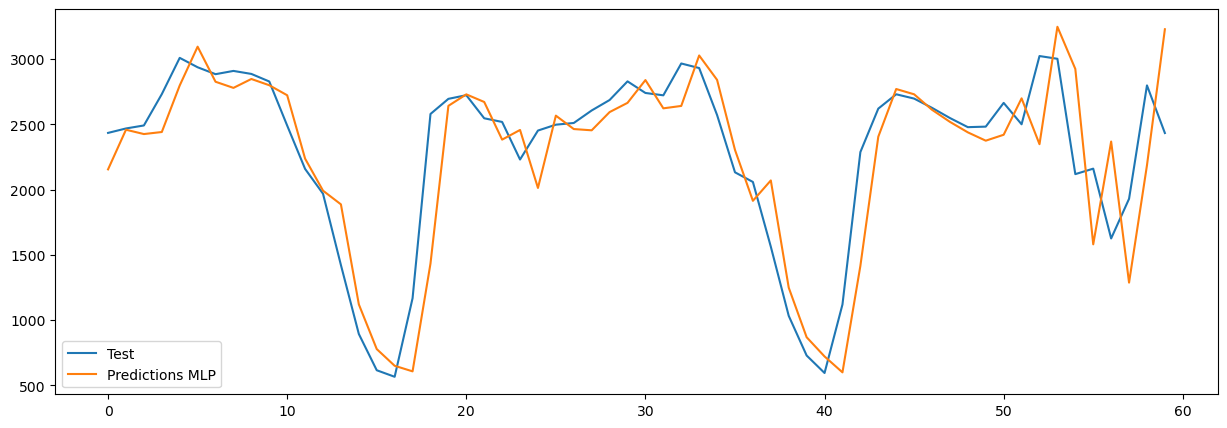

In [157]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(y_test[:,0], label='Test')
plt.plot(pred_mlp2, label='Predictions MLP')
plt.legend()
print('Volume')

### Long-Short Term Memory (LSTM) Network

In [158]:
################ Occupancy ###############
model1 = Sequential()
model1.add(LSTM(units=128,input_shape=(w,1))) ### input shape: timesteps, features
model1.add(Dense(64, activation='relu')) 
model1.add(Dense(32, activation='relu')) 
model1.add(Dense(1, activation='relu')) 
#fit model
early_stop2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=10)
model1.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model1.fit(x_train[:,:,1], y_train[:,1],epochs=200,batch_size=16,validation_split=0.2) # 20% of the train set is used for cross validation

Epoch 1/200
13/13 [==============================] - 2s 28ms/step - loss: 677.9332 - mean_absolute_error: 21.4525 - val_loss: 356.8514 - val_mean_absolute_error: 15.6875
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 468.2474 - mean_absolute_error: 16.6323 - val_loss: 161.2286 - val_mean_absolute_error: 8.8568
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 239.4197 - mean_absolute_error: 11.3573 - val_loss: 161.6904 - val_mean_absolute_error: 10.9413
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 214.8629 - mean_absolute_error: 11.6038 - val_loss: 119.4144 - val_mean_absolute_error: 8.8922
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 176.6229 - mean_absolute_error: 9.2196 - val_loss: 88.8357 - val_mean_absolute_error: 6.2736
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 152.5458 - mean_absolute_error: 8.3150 - val_loss: 78.8163 - val_mean_absolute_error: 

13/13 [==============================] - 0s 3ms/step - loss: 55.8049 - mean_absolute_error: 5.1950 - val_loss: 46.3022 - val_mean_absolute_error: 4.5915
Epoch 100/200
13/13 [==============================] - 0s 3ms/step - loss: 59.4174 - mean_absolute_error: 5.1567 - val_loss: 52.0939 - val_mean_absolute_error: 5.6933
Epoch 101/200
13/13 [==============================] - 0s 3ms/step - loss: 56.6416 - mean_absolute_error: 5.2015 - val_loss: 39.9062 - val_mean_absolute_error: 4.1556
Epoch 102/200
13/13 [==============================] - 0s 3ms/step - loss: 53.8199 - mean_absolute_error: 4.9090 - val_loss: 42.3171 - val_mean_absolute_error: 4.4603
Epoch 103/200
13/13 [==============================] - 0s 3ms/step - loss: 53.5292 - mean_absolute_error: 4.7987 - val_loss: 42.8428 - val_mean_absolute_error: 4.6120
Epoch 104/200
13/13 [==============================] - 0s 3ms/step - loss: 57.1901 - mean_absolute_error: 5.2630 - val_loss: 43.2653 - val_mean_absolute_error: 4.3248
Epoch 105/20

13/13 [==============================] - 0s 3ms/step - loss: 45.7903 - mean_absolute_error: 4.5767 - val_loss: 53.8227 - val_mean_absolute_error: 5.1974
Epoch 198/200
13/13 [==============================] - 0s 3ms/step - loss: 43.4245 - mean_absolute_error: 4.4071 - val_loss: 46.2884 - val_mean_absolute_error: 4.5070
Epoch 199/200
13/13 [==============================] - 0s 3ms/step - loss: 43.6113 - mean_absolute_error: 4.4850 - val_loss: 46.8494 - val_mean_absolute_error: 4.5043
Epoch 200/200
13/13 [==============================] - 0s 3ms/step - loss: 43.8127 - mean_absolute_error: 4.4279 - val_loss: 54.1197 - val_mean_absolute_error: 5.3178


In [159]:
# predict and evaluate
pre1 = model1.predict(x_test[:,:,1])

print("Occupancy RMSE:", mean_squared_error(y_test[:,1], pre1, squared=False))
print("Occupancy MAE:", mean_absolute_error(y_test[:,1], pre1))
print("Occupancy MAPE:", mean_absolute_percentage_error(y_test[:,1], pre1))

2/2 [==============================] - 0s 3ms/step
Occupancy RMSE: 13.253660808617365
Occupancy MAE: 7.67461558335622
Occupancy MAPE: 0.31014397072231165


Occupancy


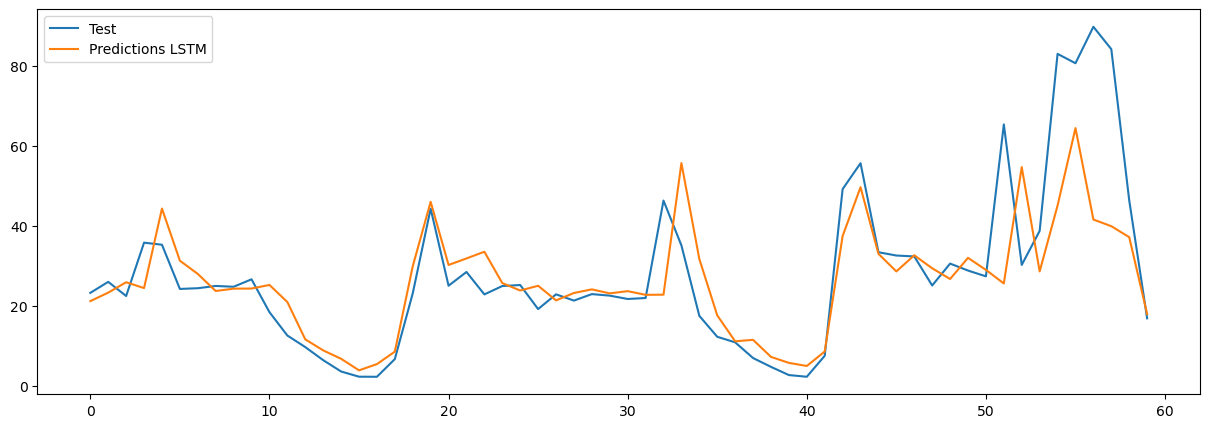

In [160]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.plot(y_test[:,1], label='Test')
plt.plot(pre1, label='Predictions LSTM')
plt.legend()
print('Occupancy')

C:\Users\Windows\AppData\Local\Temp\ipykernel_3944\3590207491.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1, p2], [p1, p2], 'b-', c='red')


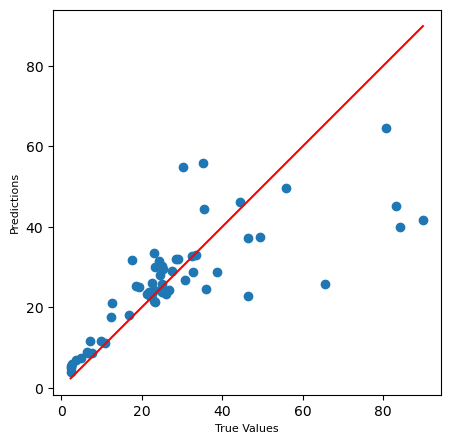

In [161]:
# print true vs predicted scatter plot

# y=x line
p1 = max(max(pre1), max(y_test[:,1]))
p2 = min(min(pre1), min(y_test[:,1]))
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot([p1, p2], [p1, p2], 'b-', c='red')

plt.scatter(y_test[:,1], pre1)
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

In [173]:
########## Volume ##########

from keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model2 = Sequential()
model2.add(LSTM(180,input_shape=(w,1))) ### input shape: timesteps, features
model2.add(Dense(64, activation='relu')) 
model2.add(Dense(16, activation='relu')) 
model2.add(Dense(8, activation='relu')) 
model2.add(Dense(1, activation='relu')) 
#fit model
early_stop2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, min_delta=10)
model2.compile(loss='mean_squared_error', optimizer=adam, metrics=['mean_absolute_error'])
model2.fit(x_train[:,:,0], y_train[:,0],epochs=500,batch_size=32,validation_split=0.2) # 20% of the train set is used for cross validation

Epoch 1/500
7/7 [==============================] - 2s 55ms/step - loss: 5694653.0000 - mean_absolute_error: 2292.6150 - val_loss: 5778466.5000 - val_mean_absolute_error: 2333.8857
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 5688464.0000 - mean_absolute_error: 2291.2783 - val_loss: 5771775.5000 - val_mean_absolute_error: 2332.4521
Epoch 3/500
7/7 [==============================] - 0s 6ms/step - loss: 5681335.5000 - mean_absolute_error: 2289.7063 - val_loss: 5763174.5000 - val_mean_absolute_error: 2330.6079
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 5671843.5000 - mean_absolute_error: 2287.6323 - val_loss: 5751027.0000 - val_mean_absolute_error: 2327.9958
Epoch 5/500
7/7 [==============================] - 0s 6ms/step - loss: 5657597.5000 - mean_absolute_error: 2284.4839 - val_loss: 5732873.0000 - val_mean_absolute_error: 2324.0938
Epoch 6/500
7/7 [==============================] - 0s 4ms/step - loss: 5637302.5000 - mean_absolute_erro

Epoch 94/500
7/7 [==============================] - 0s 6ms/step - loss: 109571.1172 - mean_absolute_error: 222.9099 - val_loss: 46521.0039 - val_mean_absolute_error: 177.4399
Epoch 95/500
7/7 [==============================] - 0s 6ms/step - loss: 119720.8516 - mean_absolute_error: 245.5475 - val_loss: 78537.1328 - val_mean_absolute_error: 233.0067
Epoch 96/500
7/7 [==============================] - 0s 5ms/step - loss: 133556.0312 - mean_absolute_error: 269.1320 - val_loss: 77708.2891 - val_mean_absolute_error: 235.5692
Epoch 97/500
7/7 [==============================] - 0s 5ms/step - loss: 117273.7812 - mean_absolute_error: 253.5202 - val_loss: 69731.1328 - val_mean_absolute_error: 201.4319
Epoch 98/500
7/7 [==============================] - 0s 5ms/step - loss: 122598.1719 - mean_absolute_error: 251.9405 - val_loss: 63687.3086 - val_mean_absolute_error: 205.3887
Epoch 99/500
7/7 [==============================] - 0s 6ms/step - loss: 102958.8906 - mean_absolute_error: 224.3568 - val_los

Epoch 141/500
7/7 [==============================] - 0s 6ms/step - loss: 91749.0859 - mean_absolute_error: 206.0138 - val_loss: 38804.4648 - val_mean_absolute_error: 164.5744
Epoch 142/500
7/7 [==============================] - 0s 5ms/step - loss: 99156.1875 - mean_absolute_error: 202.2097 - val_loss: 51299.8359 - val_mean_absolute_error: 190.4636
Epoch 143/500
7/7 [==============================] - 0s 5ms/step - loss: 93560.9219 - mean_absolute_error: 209.0774 - val_loss: 44696.0703 - val_mean_absolute_error: 170.3112
Epoch 144/500
7/7 [==============================] - 0s 6ms/step - loss: 96900.0781 - mean_absolute_error: 206.4502 - val_loss: 50218.3086 - val_mean_absolute_error: 193.1770
Epoch 145/500
7/7 [==============================] - 0s 6ms/step - loss: 87443.2578 - mean_absolute_error: 196.2507 - val_loss: 42666.8906 - val_mean_absolute_error: 166.2777
Epoch 146/500
7/7 [==============================] - 0s 5ms/step - loss: 94465.0469 - mean_absolute_error: 211.6222 - val_los

Epoch 188/500
7/7 [==============================] - 0s 6ms/step - loss: 86859.0547 - mean_absolute_error: 194.5178 - val_loss: 39274.3555 - val_mean_absolute_error: 158.1614
Epoch 189/500
7/7 [==============================] - 0s 6ms/step - loss: 87426.6406 - mean_absolute_error: 197.1492 - val_loss: 41200.7812 - val_mean_absolute_error: 161.8493
Epoch 190/500
7/7 [==============================] - 0s 6ms/step - loss: 84019.3438 - mean_absolute_error: 193.0763 - val_loss: 46267.4414 - val_mean_absolute_error: 168.6231
Epoch 191/500
7/7 [==============================] - 0s 6ms/step - loss: 90619.6406 - mean_absolute_error: 203.0771 - val_loss: 46050.1289 - val_mean_absolute_error: 164.8845
Epoch 192/500
7/7 [==============================] - 0s 6ms/step - loss: 91380.3906 - mean_absolute_error: 198.0568 - val_loss: 47231.8594 - val_mean_absolute_error: 182.7388
Epoch 193/500
7/7 [==============================] - 0s 5ms/step - loss: 95361.7188 - mean_absolute_error: 203.9147 - val_los

Epoch 235/500
7/7 [==============================] - 0s 6ms/step - loss: 99796.8125 - mean_absolute_error: 212.1434 - val_loss: 50820.9492 - val_mean_absolute_error: 172.8375
Epoch 236/500
7/7 [==============================] - 0s 6ms/step - loss: 93764.1719 - mean_absolute_error: 205.8637 - val_loss: 44363.3555 - val_mean_absolute_error: 168.9394
Epoch 237/500
7/7 [==============================] - 0s 5ms/step - loss: 97533.8828 - mean_absolute_error: 212.5263 - val_loss: 43163.5195 - val_mean_absolute_error: 168.5411
Epoch 238/500
7/7 [==============================] - 0s 6ms/step - loss: 89369.6172 - mean_absolute_error: 196.5946 - val_loss: 42454.0898 - val_mean_absolute_error: 169.6673
Epoch 239/500
7/7 [==============================] - 0s 5ms/step - loss: 85287.9062 - mean_absolute_error: 193.7243 - val_loss: 53295.2266 - val_mean_absolute_error: 195.0908
Epoch 240/500
7/7 [==============================] - 0s 6ms/step - loss: 93049.2656 - mean_absolute_error: 204.9431 - val_los

Epoch 282/500
7/7 [==============================] - 0s 6ms/step - loss: 83224.3750 - mean_absolute_error: 187.2553 - val_loss: 89975.9375 - val_mean_absolute_error: 253.8469
Epoch 283/500
7/7 [==============================] - 0s 6ms/step - loss: 97758.8750 - mean_absolute_error: 205.1332 - val_loss: 40119.4766 - val_mean_absolute_error: 156.3082
Epoch 284/500
7/7 [==============================] - 0s 6ms/step - loss: 97701.3594 - mean_absolute_error: 212.7311 - val_loss: 93824.1172 - val_mean_absolute_error: 237.6158
Epoch 285/500
7/7 [==============================] - 0s 5ms/step - loss: 106109.8594 - mean_absolute_error: 218.2073 - val_loss: 63173.3594 - val_mean_absolute_error: 213.1412
Epoch 286/500
7/7 [==============================] - 0s 6ms/step - loss: 91537.4688 - mean_absolute_error: 207.7157 - val_loss: 46039.6719 - val_mean_absolute_error: 178.0327
Epoch 287/500
7/7 [==============================] - 0s 6ms/step - loss: 95942.0625 - mean_absolute_error: 206.4089 - val_lo

Epoch 329/500
7/7 [==============================] - 0s 5ms/step - loss: 92896.7344 - mean_absolute_error: 202.6013 - val_loss: 59108.5352 - val_mean_absolute_error: 199.2639
Epoch 330/500
7/7 [==============================] - 0s 6ms/step - loss: 117717.2188 - mean_absolute_error: 233.8335 - val_loss: 50564.5195 - val_mean_absolute_error: 176.1518
Epoch 331/500
7/7 [==============================] - 0s 5ms/step - loss: 110850.7812 - mean_absolute_error: 234.1586 - val_loss: 57884.5469 - val_mean_absolute_error: 184.3185
Epoch 332/500
7/7 [==============================] - 0s 5ms/step - loss: 108122.0469 - mean_absolute_error: 224.0040 - val_loss: 52272.2188 - val_mean_absolute_error: 191.3746
Epoch 333/500
7/7 [==============================] - 0s 6ms/step - loss: 94359.2188 - mean_absolute_error: 206.1099 - val_loss: 45004.8008 - val_mean_absolute_error: 177.8420
Epoch 334/500
7/7 [==============================] - 0s 5ms/step - loss: 86637.7109 - mean_absolute_error: 200.2803 - val_

Epoch 376/500
7/7 [==============================] - 0s 6ms/step - loss: 118203.5469 - mean_absolute_error: 226.1900 - val_loss: 49313.5312 - val_mean_absolute_error: 186.7043
Epoch 377/500
7/7 [==============================] - 0s 5ms/step - loss: 92128.6719 - mean_absolute_error: 208.3424 - val_loss: 49913.9141 - val_mean_absolute_error: 176.3990
Epoch 378/500
7/7 [==============================] - 0s 6ms/step - loss: 95729.9609 - mean_absolute_error: 217.2047 - val_loss: 54728.5117 - val_mean_absolute_error: 184.8461
Epoch 379/500
7/7 [==============================] - 0s 5ms/step - loss: 92943.6406 - mean_absolute_error: 209.5470 - val_loss: 43507.6914 - val_mean_absolute_error: 169.0930
Epoch 380/500
7/7 [==============================] - 0s 6ms/step - loss: 107250.7109 - mean_absolute_error: 223.6148 - val_loss: 71285.8594 - val_mean_absolute_error: 235.7137
Epoch 381/500
7/7 [==============================] - 0s 5ms/step - loss: 108275.2734 - mean_absolute_error: 240.3101 - val_

Epoch 423/500
7/7 [==============================] - 0s 6ms/step - loss: 88172.3281 - mean_absolute_error: 195.7814 - val_loss: 41913.7031 - val_mean_absolute_error: 171.5295
Epoch 424/500
7/7 [==============================] - 0s 3ms/step - loss: 84101.2266 - mean_absolute_error: 191.3767 - val_loss: 39858.0859 - val_mean_absolute_error: 163.6104
Epoch 425/500
7/7 [==============================] - 0s 5ms/step - loss: 86312.0469 - mean_absolute_error: 195.4435 - val_loss: 39335.9062 - val_mean_absolute_error: 157.7732
Epoch 426/500
7/7 [==============================] - 0s 5ms/step - loss: 86062.7656 - mean_absolute_error: 188.8736 - val_loss: 46513.1094 - val_mean_absolute_error: 177.2861
Epoch 427/500
7/7 [==============================] - 0s 6ms/step - loss: 101646.7500 - mean_absolute_error: 214.8309 - val_loss: 38665.2891 - val_mean_absolute_error: 154.1598
Epoch 428/500
7/7 [==============================] - 0s 5ms/step - loss: 108999.0547 - mean_absolute_error: 217.0036 - val_l

Epoch 470/500
7/7 [==============================] - 0s 6ms/step - loss: 90143.9297 - mean_absolute_error: 200.9040 - val_loss: 39493.8008 - val_mean_absolute_error: 156.4233
Epoch 471/500
7/7 [==============================] - 0s 5ms/step - loss: 86775.5156 - mean_absolute_error: 190.9477 - val_loss: 40628.8438 - val_mean_absolute_error: 162.1771
Epoch 472/500
7/7 [==============================] - 0s 5ms/step - loss: 85386.1016 - mean_absolute_error: 188.8009 - val_loss: 53820.2500 - val_mean_absolute_error: 189.9831
Epoch 473/500
7/7 [==============================] - 0s 5ms/step - loss: 91581.6875 - mean_absolute_error: 200.9646 - val_loss: 39739.7188 - val_mean_absolute_error: 161.6942
Epoch 474/500
7/7 [==============================] - 0s 6ms/step - loss: 85551.0391 - mean_absolute_error: 193.3314 - val_loss: 41873.8242 - val_mean_absolute_error: 164.8472
Epoch 475/500
7/7 [==============================] - 0s 6ms/step - loss: 86014.7969 - mean_absolute_error: 190.2575 - val_los

2/2 [==============================] - 0s 2ms/step
Volume RMSE: 294.87776542280454
Volume MAE: 239.14832458496093
Volume MAPE: 0.11135529298909265


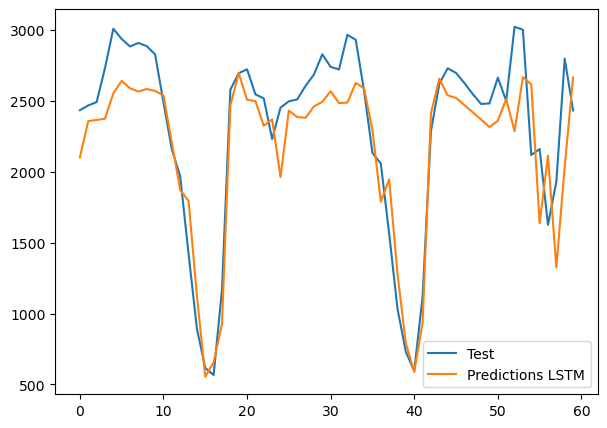

In [178]:
# predict and evaluate
#pre2 = model2.predict(scaler.transform(x_test[:,:,0]))
#pre2 = scaler2.inverse_transform(pre2)
pre2 = model2.predict(x_test[:,:,0])
print("Volume RMSE:", mean_squared_error(y_test[:,0], pre2, squared=False))
print("Volume MAE:", mean_absolute_error(y_test[:,0], pre2))
print("Volume MAPE:", mean_absolute_percentage_error(y_test[:,0], pre2))

plt.rcParams['figure.figsize'] = [7, 5]
plt.plot((y_test[:,0]), label='Test')
plt.plot(pre2, label='Predictions LSTM')
plt.legend()

C:\Users\Windows\AppData\Local\Temp\ipykernel_3944\1660498023.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot([p1, p2], [p1, p2], 'b-', c='red')
C:\Users\Windows\anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


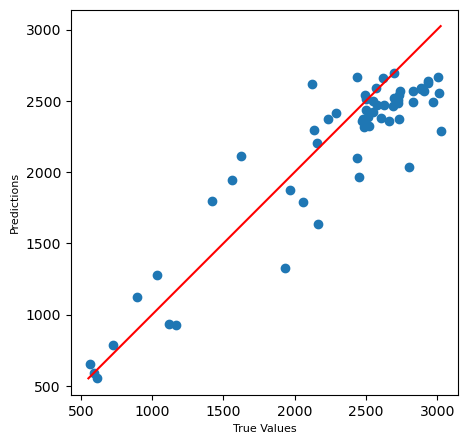

In [175]:
# print true vs predicted scatter plot

# y=x line
p1 = max(max(pre2), max(y_test[:,0]))
p2 = min(min(pre2), min(y_test[:,0]))
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot([p1, p2], [p1, p2], 'b-', c='red')


plt.scatter(y_test[:,0], pre2)
plt.xlabel('True Values', fontsize=8)
plt.ylabel('Predictions', fontsize=8)
plt.axis('equal')
plt.show()

Μπορούμε ξεκάθαρα να παρατηρήσουμε ότι τα μοντέλα Βαθιάς Μάθησης προβλέπουν με σημαντικά μεγαλύτερη ακρίβεια τις μελλοντικές τιμές και των δύο χρονοσειρών, σε σχέση με τα ARIMA. Ακόμα, τα LSTM επιτυγχάνουν περαιτέρω μείωση των τιμών των σφαλμάτων σε σχέση με τα MLP, γεγονός που οφείλεται στην καταλληλότητα της συγκεκριμένης αρχιτεκτονικής στην ανάλυση χρονοσειρών.